# Q4 - Vibrance Enhancing

In [26]:
import numpy as np, cv2 as cv, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data/a1images")
RESULTS = Path("../results/q4")
RESULTS.mkdir(parents=True, exist_ok=True)

img_path = DATA / "spider.png"
img_bgr = cv.imread(str(img_path), cv.IMREAD_COLOR)
assert img_bgr is not None, f"Image not found at {img_path}"
print("Loaded:", img_path, "shape:", img_bgr.shape)

Loaded: ../data/a1images/spider.png shape: (438, 780, 3)


In [27]:
# Split to HSV
hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(hsv)

# Save planes (grayscale previews)
cv.imwrite(str(RESULTS/"q4_H_plane.png"), H)
cv.imwrite(str(RESULTS/"q4_S_plane.png"), S)
cv.imwrite(str(RESULTS/"q4_V_plane.png"), V)

True

In [28]:
# Vibrance transform on S plane
# f(x) = min( x + a * 128 * exp(-(x-128)^2 / (2*sigma^2)), 255 )
sigma = 70.0  # fixed per question
a = 0.6       # <-- tweak visually; must be in [0, 1]

In [29]:
x = np.arange(256, dtype=np.float32)
boost = a * 128.0 * np.exp(-((x - 128.0)**2) / (2.0 * sigma**2))
lut = np.clip(x + boost, 0, 255).astype(np.uint8)

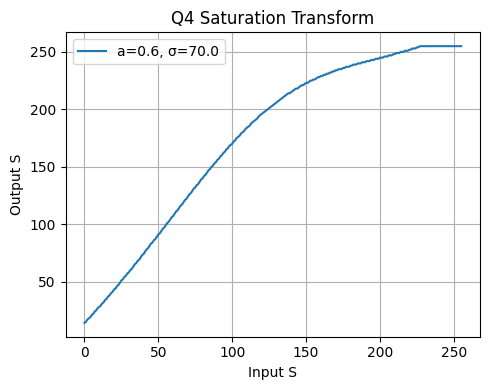

In [30]:
# Plot the transform curve
plt.figure(figsize=(5, 4))
plt.plot(x, lut, label=f"a={a}, σ={sigma}")
plt.title("Q4 Saturation Transform")
plt.xlabel("Input S")
plt.ylabel("Output S")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(RESULTS/f"q4_transform_curve_a_{a}.png", dpi=150)
plt.show()

In [31]:
# Apply LUT to S only
S_enh = cv.LUT(S, lut)

# Recombine and convert back to BGR/RGB for viewing
hsv_enh = cv.merge([H, S_enh, V])
bgr_enh = cv.cvtColor(hsv_enh, cv.COLOR_HSV2BGR)
rgb_enh = cv.cvtColor(bgr_enh, cv.COLOR_BGR2RGB)
rgb_orig = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Save outputs
cv.imwrite(str(RESULTS/f"q4_vibrance_enhanced_a_{a}.png"), bgr_enh)
cv.imwrite(str(RESULTS/"q4_original.png"), img_bgr)

True

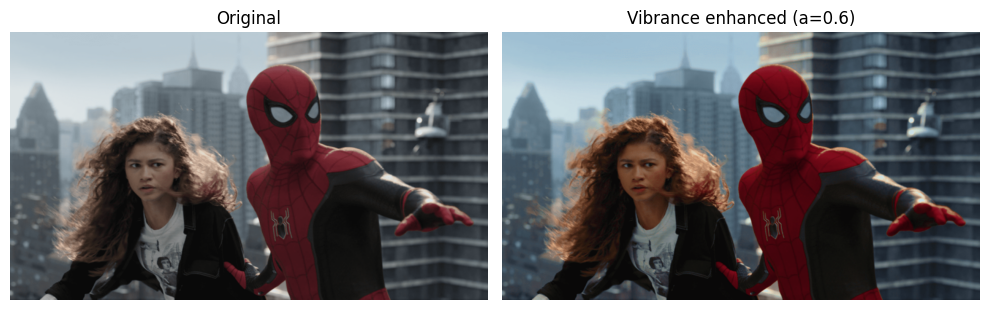

In [32]:
# Side-by-side
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(rgb_orig)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rgb_enh)
plt.title(f"Vibrance enhanced (a={a})")
plt.axis('off')
plt.tight_layout()
plt.savefig(RESULTS/f"q4_side_by_side_a_{a}.png", dpi=150)
plt.show()